# Reading and Writing HTML Files

In [1]:
import numpy as np
import pandas as pd

I/O API for html:
- read_html()
- to_html() <br> <br>

Very often, however, the data are reported as part of the text of web pages. So also having available a function for reading could prove to be really useful. This activity is so widespread that it is currently identified as Web Scraping. This process is becoming a fundamental part of the set of processes that will be integrated in the first part of the data analysis: datamining and data preparation.

## Writing Data in HTML

In [2]:
frame = pd.DataFrame(np.random.randint(100, 200, (2, 2)))

In [4]:
print(frame.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>148</td>
      <td>144</td>
    </tr>
    <tr>
      <th>1</th>
      <td>153</td>
      <td>145</td>
    </tr>
  </tbody>
</table>


In [5]:
frame.to_html('test1.html')

In [6]:
frame = pd.DataFrame(np.random.random((4,4)),
                     index = ['white','black','red','blue'],
                     columns = ['up','down','right','left'])

In [7]:
frame

,up,down,right,left
white,0.638066,0.619914,0.330341,0.709517
black,0.164649,0.947201,0.883553,0.900547
red,0.452274,0.800660,0.093117,0.114720
blue,0.385194,0.561507,0.706699,0.893854


Create a string that contains the code of the HTML page

In [8]:
s = ['<HTML>']
s.append('<HEAD><TITLE>My DataFrame</TITLE></HEAD>')
s.append('<BODY>')
s.append(frame.to_html())
s.append('</BODY></HTML>')
html = ''.join(s)

In [9]:
html

'<HTML><HEAD><TITLE>My DataFrame</TITLE></HEAD><BODY><table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>up</th>\n      <th>down</th>\n      <th>right</th>\n      <th>left</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>white</th>\n      <td>0.638066</td>\n      <td>0.619914</td>\n      <td>0.330341</td>\n      <td>0.709517</td>\n    </tr>\n    <tr>\n      <th>black</th>\n      <td>0.164649</td>\n      <td>0.947201</td>\n      <td>0.883553</td>\n      <td>0.900547</td>\n    </tr>\n    <tr>\n      <th>red</th>\n      <td>0.452274</td>\n      <td>0.800660</td>\n      <td>0.093117</td>\n      <td>0.114720</td>\n    </tr>\n    <tr>\n      <th>blue</th>\n      <td>0.385194</td>\n      <td>0.561507</td>\n      <td>0.706699</td>\n      <td>0.893854</td>\n    </tr>\n  </tbody>\n</table></BODY></HTML>'

In [10]:
print(html)

<HTML><HEAD><TITLE>My DataFrame</TITLE></HEAD><BODY><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>up</th>
      <th>down</th>
      <th>right</th>
      <th>left</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>white</th>
      <td>0.638066</td>
      <td>0.619914</td>
      <td>0.330341</td>
      <td>0.709517</td>
    </tr>
    <tr>
      <th>black</th>
      <td>0.164649</td>
      <td>0.947201</td>
      <td>0.883553</td>
      <td>0.900547</td>
    </tr>
    <tr>
      <th>red</th>
      <td>0.452274</td>
      <td>0.800660</td>
      <td>0.093117</td>
      <td>0.114720</td>
    </tr>
    <tr>
      <th>blue</th>
      <td>0.385194</td>
      <td>0.561507</td>
      <td>0.706699</td>
      <td>0.893854</td>
    </tr>
  </tbody>
</table></BODY></HTML>


In [40]:
html_file = open('myFrame.html', 'w')
html_file.write(html)
html_file.close()

## Reading Data From an HTML File

As you just saw, pandas can easily generate HTML tables starting from data frame. The opposite process is also possible; the function read_html () will perform a parsing an HTML page looking for an HTML table. If found, it will convert that table into an object DataFrame ready to be used in our data analysis. More precisely, the read_html() function returns a list of DataFrame even if there is only one table. As regards the source to be subjected to parsing, this can be of different types. For example, you may have to read an HTML file in any directory. For example you can parse the HTML file you created in the previous example.

In [12]:
web_frames = pd.read_html('myFrame.html')

In [16]:
web_frames[0]

,Unnamed: 0,up,down,right,left
0,white,0.638066,0.619914,0.330341,0.709517
1,black,0.164649,0.947201,0.883553,0.900547
2,red,0.452274,0.800660,0.093117,0.114720
3,blue,0.385194,0.561507,0.706699,0.893854


In [15]:
web_frames[0].set_index('Unnamed: 0')

,up,down,right,left
Unnamed: 0,,,,
white,0.638066,0.619914,0.330341,0.709517
black,0.164649,0.947201,0.883553,0.900547
red,0.452274,0.800660,0.093117,0.114720
blue,0.385194,0.561507,0.706699,0.893854


However, the mode most commonly used regarding the read_html() function is that of a direct parsing
of an URL on the Web. In this way the web pages in the network are directly parsed with the extraction of the
tables within them.

In [17]:
ranking = pd.read_html('http://www.meccanismocomplesso.org/en/meccanismo-complesso-sito-2/classifica-punteggio/')

In [19]:
ranking[0].head()

,#,Nome,Exp,Livelli
0,1,Fabio Nelli,17845,NaN
1,2,admin,9029,NaN
2,3,BrunoOrsini,2168,NaN
3,4,Berserker,700,NaN
4,5,Dnocioni,556,NaN


---

# Reading Data from XML

In the list of I/O API functions, there is no specific tool regarding the XML (Extensible Markup Language) format. In fact, although it is not listed, this format is very important, because many structured data are available in XML format. This presents no problem, since Python has many other libraries (besides pandas) that manage the reading and writing of data in XML format. <br> 

One of these libraries is the lxml library, which stands out for its excellent performance during the parsing of very large files. In this section you will be shown how to use this module for parsing XML files and how to integrate it with pandas to finally get the DataFrame containing the requested data. For more information about this library, I highly recommend visiting the official website of lxml: http://lxml.de/index.html.

In [20]:
from lxml import objectify

In [23]:
# xml = objectify.parse('books.xml')

---

# Reading and Writing Data on Microsft Excel Files

I/O for excel files:
- read_excel()
- to_excel()

- pd.read_excel('data.xls')
- pd.read_excel('data.xlsx', 'Sheet2') - to specify which sheet
- pd.read_excel('data.xls', 1) - same as above

In [24]:
frame = pd.DataFrame(np.random.random((4,4)),
                    index = ['exp1','exp2','exp3','exp4'],
                    columns = ['Jan2015','Fab2015','Mar2015','Apr2005'])

In [25]:
frame.to_excel('data.xlsx')

---

# JSON Data

JSON (JavaScript Object Notation) has become one of the most common standard formats, especially for the transmission of data through the Web. So it is normal to have to do with this data format if you want to use the available data on the Web. 

The special feature of this format is its great flexibility, though its structure is far from being the one to which you are well accustomed, i.e., tabular. 

In this section you will see how to use the read_json() and to_json() functions to stay within the I/O API functions discussed in this chapter. But in the second part you will see another example in which you will have to deal with structured data in JSON format much more related to real cases. 

In my opinion, a useful online application for checking the JSON format is JSONViewer, available at http://jsonviewer.stack.hu/. This web application, once you entered or copied data in JSON format, allows you to see if the format you entered is invalid. Moreover it displays the tree structure so that you can better understand its structure (as shown in Figure 5-4).

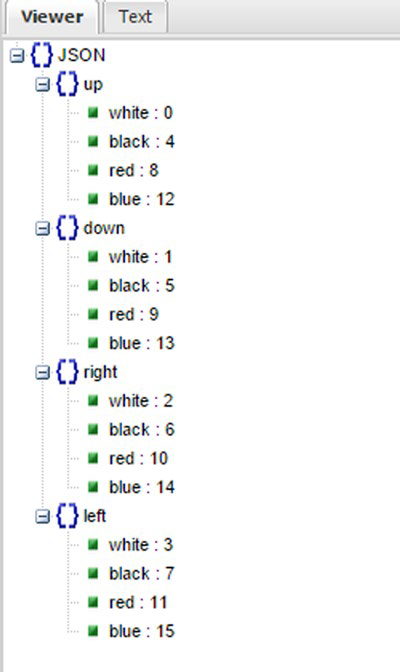

In [27]:
frame

,Jan2015,Fab2015,Mar2015,Apr2005
exp1,0.338346,0.038203,0.316771,0.754247
exp2,0.445833,0.499483,0.475664,0.770656
exp3,0.076196,0.342188,0.570580,0.982283
exp4,0.676727,0.042080,0.463417,0.576434


In [28]:
frame = pd.DataFrame(np.arange(16).reshape(4,4),
                        index=['white','black','red','blue'],
                        columns=['up','down','right','left'])

In [29]:
frame

,up,down,right,left
white,0,1,2,3
black,4,5,6,7
red,8,9,10,11
blue,12,13,14,15


In [30]:
frame.to_json('frame.json')

In [31]:
pd.read_json('frame.json')

,up,down,right,left
black,4,5,6,7
blue,12,13,14,15
red,8,9,10,11
white,0,1,2,3


The example you have seen is a fairly simple case in which the JSON data were in tabular form (since
the file frame.json comes from a DataFrame). Generally, however, the JSON files do not have a tabular
structure. Thus, you will need to somehow convert the structure dict file in tabular form. You can refer this
process as normalization.

The library pandas provides a function, called json_normalize(), that is able to convert a dict or a list in
a table. First you have to import the function

In [32]:
from pandas.io.json import json_normalize

As you can see, the file structure is no longer tabular, but more complex. Then the approach with the
read_json() function is no longer valid. As you learn from this example, you can still get the data in tabular
form from this structure. First you have to load the contents of the JSON file and convert it into a string.

In [33]:
file = open('books.json', 'r')
text = file.read()
type(text)

str

In [37]:
# text = pd.loads(text)

---

# Picke-Python Object Serialization

The pickle module implements a powerful algorithm for serialization and de-serialization of a data structure implemented in Python. Pickling is the process in which the __hierarchy of an object is converted into a stream of bytes.__

This allows an object to be transmitted and stored, and then to be rebuilt by the receiver itself retaining all the original features.

In Python, the picking operation is carried out by the pickle module, but currently there is a module called cPickle which is the result of an enormous amount of work optimizing the pickle module (written in C). This module can be in fact in many cases even 1,000 times faster than the pickle module. However, regardless of which module you do use, the interfaces of the two modules are almost the same. Before moving to explicitly mention the I/O functions of pandas that operate on this format, let’s look in more detail at cPickle module and how to use it.

## Serialization a Python Object with cPickle

In [42]:
import pickle

In [43]:
data = { 'color': ['white','red'], 'value': [5, 7]}

In [45]:
# Now you will perform a serialization of the data object through 
# the dumps() function of the cPickle module.
pickled_data = pickle.dumps(data)
type(pickled_data)

bytes

In [46]:
print(pickled_data)

b'\x80\x03}q\x00(X\x05\x00\x00\x00colorq\x01]q\x02(X\x05\x00\x00\x00whiteq\x03X\x03\x00\x00\x00redq\x04eX\x05\x00\x00\x00valueq\x05]q\x06(K\x05K\x07eu.'


In [47]:
nframe = pickle.loads(pickled_data)

In [48]:
nframe

{'color': ['white', 'red'], 'value': [5, 7]}

## Pickling with pandas

In [49]:
frame = pd.DataFrame(np.arange(16).reshape(4,4), 
                     index = ['up','down','left','right'])

In [50]:
frame.to_pickle('frame.pkl')

In [51]:
pd.read_pickle('frame.pkl')

,0,1,2,3
up,0,1,2,3
down,4,5,6,7
left,8,9,10,11
right,12,13,14,15


# Important Points

- HTML file: 
    - write: 
        - object.to_html()
        - html_file = open('file.html', 'w')
        - html_file.write(dataframe)
        - html.close()
    - read: return a list of tabular data or DataFrame object
        - pd.read_html('file.html')
        - pd.read_html('web_page_url')
- XML:
- excel file: 
    - write: object.to_excel('file.xlsx')
    - read: 
        - pd.read_excel('file.xlsx', 'Sheet1')
        - pd.read_excel('file.xlsx', 0)
- JSON
- HDF5
- Pickele Serialization Object:
    - serialize using pickle.dumps()
    - deserialize using pickle.loads()
    - write: object.to_pickle('file'pkl')
    - read: pd.read_pickle('file.pkl')